# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | asau
City not found. Skipping...
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | pangkalanbuun
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | kaeo
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | muncar
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | paamiut
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | hibbing
Processing Record 16 of Set 1 | newport
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | raudeberg
Processing Record 19 of Set 1 | rawson
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | meulaboh
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set

Processing Record 34 of Set 4 | khatanga
Processing Record 35 of Set 4 | dikson
Processing Record 36 of Set 4 | xai-xai
Processing Record 37 of Set 4 | nishihara
Processing Record 38 of Set 4 | barcelona
Processing Record 39 of Set 4 | sibolga
Processing Record 40 of Set 4 | george town
Processing Record 41 of Set 4 | zhigansk
Processing Record 42 of Set 4 | vila franca do campo
Processing Record 43 of Set 4 | price
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | vanavara
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | mandurah
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 0 of Set 5 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | kilindoni
Processing Record 3 of Set 5 | amahai
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | saint-philippe
Processing 

Processing Record 24 of Set 8 | awjilah
Processing Record 25 of Set 8 | jieshi
Processing Record 26 of Set 8 | ndjole
Processing Record 27 of Set 8 | khowst
City not found. Skipping...
Processing Record 28 of Set 8 | rafaela
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | husavik
Processing Record 31 of Set 8 | rio gallegos
Processing Record 32 of Set 8 | bambous virieux
Processing Record 33 of Set 8 | bukachacha
Processing Record 34 of Set 8 | sechura
Processing Record 35 of Set 8 | beira
Processing Record 36 of Set 8 | cidreira
Processing Record 37 of Set 8 | tazovskiy
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 8 | mirnyy
Processing Record 41 of Set 8 | guilin
Processing Record 42 of Set 8 | la rioja
Processing Record 43 of Set 8 | el cobre
Processing Record 44 of Set 8 | brawley
Processing Record 45 of Set 8 | sirumugai
Process

Processing Record 9 of Set 12 | brejo da madre de deus
Processing Record 10 of Set 12 | havelock
Processing Record 11 of Set 12 | kusa
Processing Record 12 of Set 12 | bunia
Processing Record 13 of Set 12 | sardarshahr
Processing Record 14 of Set 12 | ciechanow
Processing Record 15 of Set 12 | soyaux
Processing Record 16 of Set 12 | atocha
Processing Record 17 of Set 12 | kurumkan
Processing Record 18 of Set 12 | bayangol
Processing Record 19 of Set 12 | isangel
Processing Record 20 of Set 12 | umm kaddadah
Processing Record 21 of Set 12 | dubbo
Processing Record 22 of Set 12 | chupei
City not found. Skipping...
Processing Record 23 of Set 12 | fillan
Processing Record 24 of Set 12 | duvan
Processing Record 25 of Set 12 | knysna
Processing Record 26 of Set 12 | nanga eboko
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | kamyshlov
Processing Record 29 of Set 12 | jiaocheng
Processing Record 30 of Set 12 | lodja
Processing Record 31 of Set 12 | asosa
Processi

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,99,AR,1563163394,85,-38.31,-60.23,45.09,9.60
1,pangkalanbuun,74,ID,1563163341,61,-2.68,111.62,83.25,4.88
2,kavieng,98,PG,1563163400,79,-2.57,150.80,82.17,8.86
3,kaeo,5,NZ,1563163450,71,-35.10,173.78,62.01,14.00
4,ushuaia,40,AR,1563163401,86,-54.81,-68.31,37.40,3.36


## Latitude vs. Temperature Plot

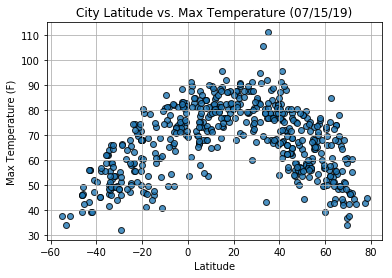

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

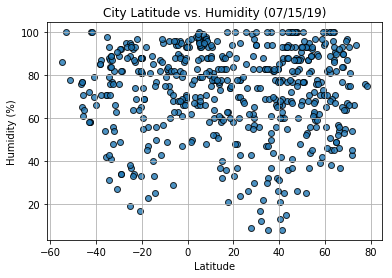

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

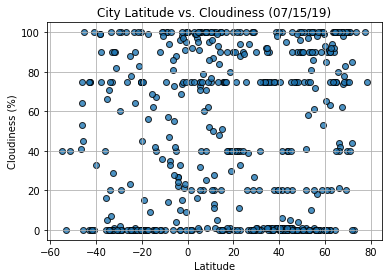

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

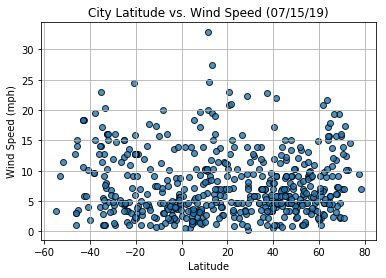

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()